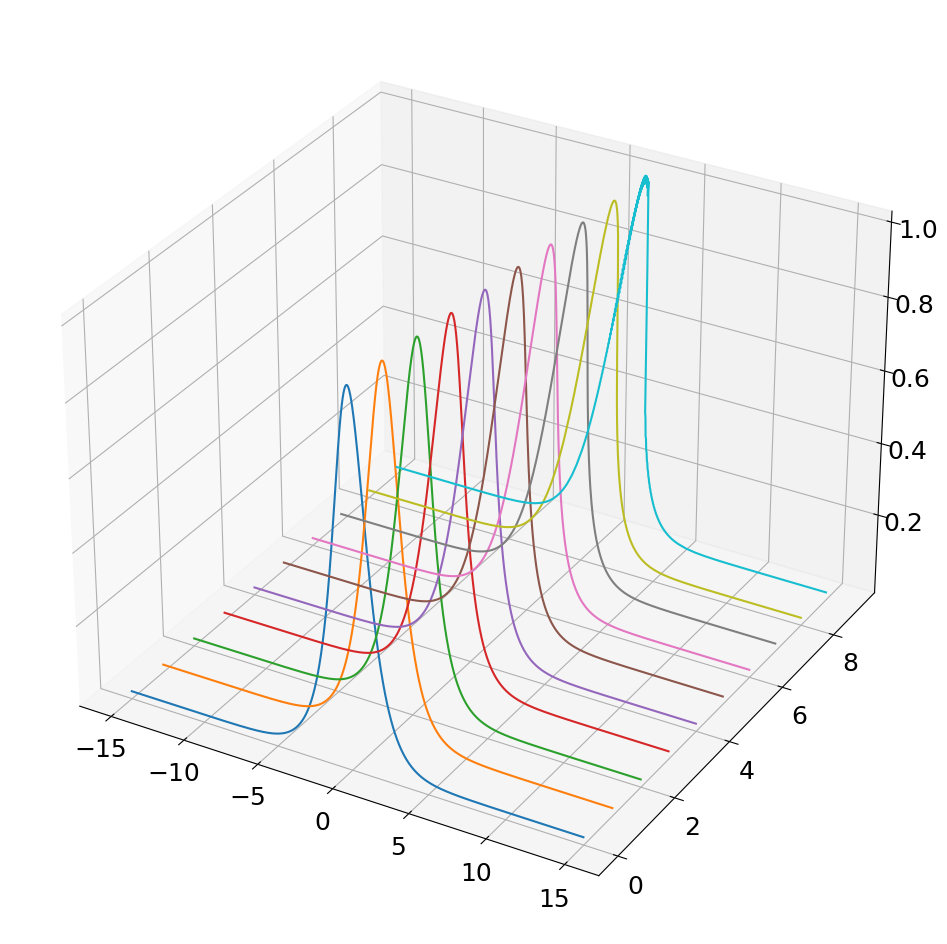

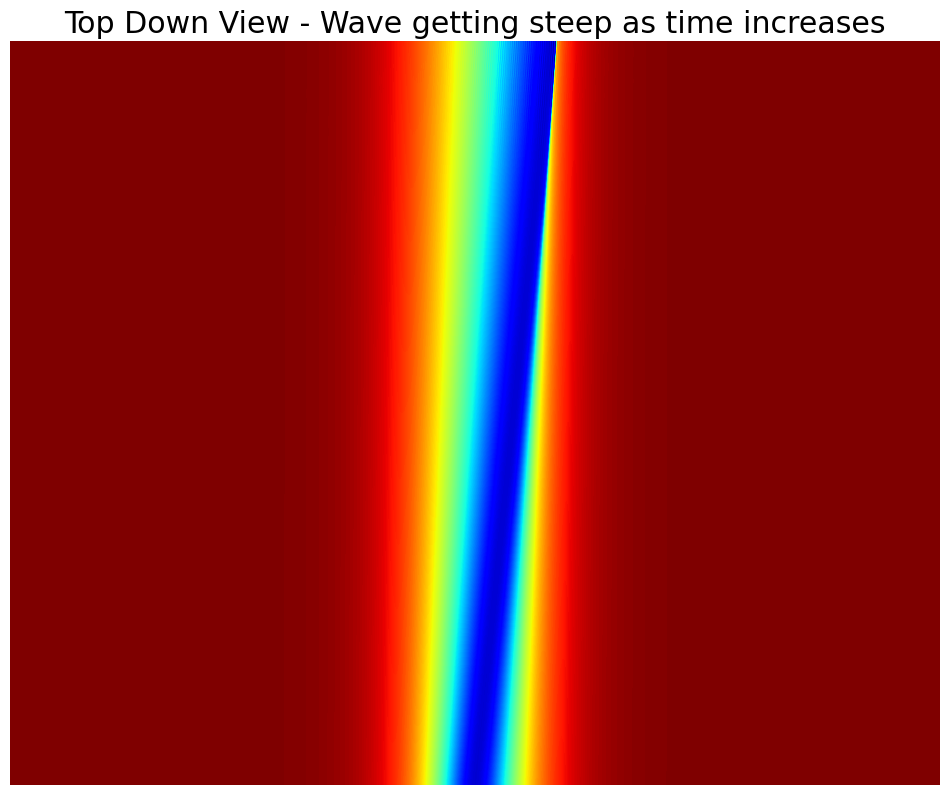

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from mpl_toolkits.mplot3d import axes3d
import matplotlib.cm as cm
plt.rcParams['figure.figsize']= [12,12]
plt.rcParams.update({'font.size': 18})

# Burgers Equation

nu = 0.001
L = 30
n = 1000
dx = L/n
x = np.arange(-L/2, L/2, dx)

w = 2*np.pi*np.fft.fftfreq(n,d=dx)

# Initial Conditions
u0 = 1/np.cosh(x)

dt = 0.025
t = np.arange(0,100*dt,dt)

def burgers(u,t,w,a):
    u_h = np.fft.fft(u)
    d_u_h = (1j)*w*u_h
    dd_u_h = -np.power(w,2)*u_h
    d_u = np.fft.ifft(d_u_h)
    dd_u = np.fft.ifft(dd_u_h)
    du_dt = -u * d_u + nu*dd_u
    return du_dt.real

u = odeint(burgers,u0, t, args=(w,nu))

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
plt.set_cmap('jet_r')

u_p = u[0:-1:10,:]
for j in range(u_p.shape[0]):
  y = j*np.ones(u_p.shape[1])
  ax.plot(x,y,u_p[j,:])

plt.figure()
plt.imshow(np.flipud(u), aspect=8)
plt.axis('off')
plt.title("Top Down View - Wave getting steep as time increases")
plt.show()

